# EDA and Linear Regression

### Objective:
Perform exploratory data analysis (EDA) and build linear regression models using the provided dataset.

**Steps:**
1. Load and inspect the dataset  
2. Perform exploratory data analysis  
3. Build a linear regression model  
4. Interpret results and compare models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
df = pd.read_csv("homes.csv")   # or the actual filename
df.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160.0,28.0,10.0,5.0,3.0,60.0,0.28,3167.0
1,175,180.0,18.0,8.0,4.0,1.0,12.0,0.43,4033.0
2,129,132.0,13.0,6.0,3.0,1.0,41.0,0.33,1471.0
3,138,140.0,17.0,7.0,3.0,1.0,22.0,0.46,3204.0
4,232,240.0,25.0,8.0,4.0,3.0,5.0,2.05,3613.0


In [7]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sell    51 non-null     object 
 1   List    50 non-null     float64
 2   Living  50 non-null     float64
 3   Rooms   50 non-null     float64
 4   Beds    50 non-null     float64
 5   Baths   50 non-null     float64
 6   Age     50 non-null     float64
 7   Acres   50 non-null     float64
 8   Taxes   50 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.7+ KB


Sell      0
List      1
Living    1
Rooms     1
Beds      1
Baths     1
Age       1
Acres     1
Taxes     1
dtype: int64

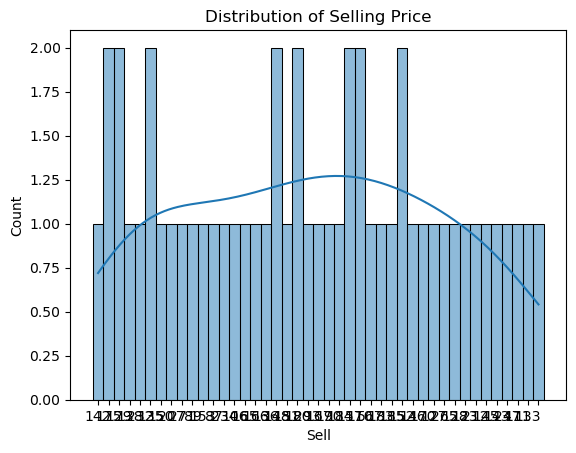

In [9]:
sns.histplot(df['Sell'], kde=True)
plt.title("Distribution of Selling Price")
plt.show()

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: ' '

<Figure size 800x600 with 0 Axes>

In [13]:
df.dtypes


Sell       object
List      float64
Living    float64
Rooms     float64
Beds      float64
Baths     float64
Age       float64
Acres     float64
Taxes     float64
dtype: object

In [17]:
import numpy as np
import pandas as pd

# Turn empty strings or all-space strings into NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

# (Optional) If you have currency/commas like "$123,456" in numeric columns:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '', regex=False) \
                         .str.replace('$', '', regex=False) \
                         .str.replace('%', '', regex=False)


In [19]:
num_candidates = ['Sell','Taxes','Baths','Bedroom','Area']  # <- edit to match your dataset
for col in num_candidates:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [21]:
num_df = df.select_dtypes(include='number')

# Optional: if too many NaN after coercion, drop rows for corr calc
corr_df = num_df.dropna(axis=0, how='any')  # or how='all' to be looser


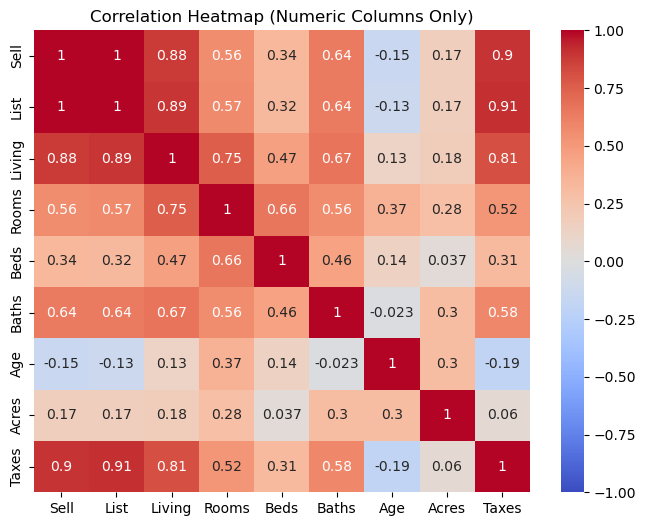

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()


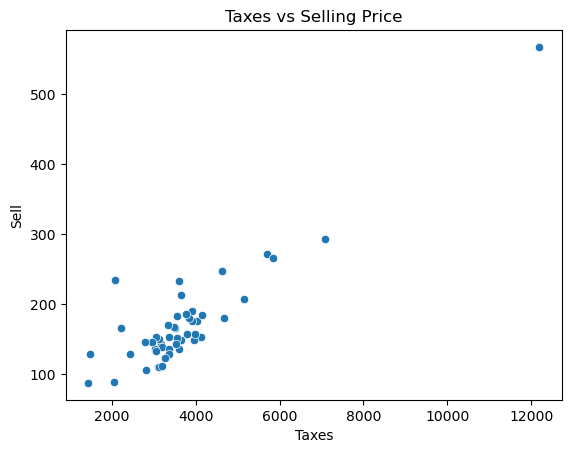

In [27]:
sns.scatterplot(x='Taxes', y='Sell', data=df)
plt.title("Taxes vs Selling Price")
plt.show()

In [29]:
X = df[['Taxes']]
y = df['Sell']

X = sm.add_constant(X)  # add intercept
model = sm.OLS(y, X).fit()
model.summary()

MissingDataError: exog contains inf or nans

In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Force to numeric (turns non-numeric to NaN)
for col in ['Sell', 'Taxes']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Replace ±inf with NaN (just in case)
df[['Sell','Taxes']] = df[['Sell','Taxes']].replace([np.inf, -np.inf], np.nan)

In [35]:
y = df['Sell']
X = df[['Taxes']]

# Add intercept
X = sm.add_constant(X)

# Keep only rows where both X and y are finite
good = np.isfinite(X).all(axis=1) & np.isfinite(y)
X_clean = X.loc[good]
y_clean = y.loc[good]

print("Dropped rows:", len(df) - len(X_clean))
print(X_clean.shape, y_clean.shape)

Dropped rows: 1
(50, 2) (50,)


In [37]:
model = sm.OLS(y_clean, X_clean).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           7.22e-19
Time:                        23:07:43   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.155      -6.635      40.378
Taxes          0.0414      0.003     14.250      0.000       0.036       0.047
==============================================================================
Omnibus:                       28.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.574
Skew:                           1.690   Prob(JB):                     1.16e-13
Kurtosis:                       7.144   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
bad_rows = df.index[~good]
df.loc[bad_rows, ['Sell','Taxes']].head(10)

,Sell,Taxes
50,NaN,NaN


In [43]:
# Coerce and clean
df['Beds'] = pd.to_numeric(df['Beds'], errors='coerce')
df['Beds'] = df['Beds'].replace([np.inf, -np.inf], np.nan)

# Build, filter, fit
X2 = sm.add_constant(df[['Beds']])
good2 = np.isfinite(X2).all(axis=1) & np.isfinite(y)
model2 = sm.OLS(y.loc[good2], X2.loc[good2]).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     6.072
Date:                Mon, 13 Oct 2025   Prob (F-statistic):             0.0174
Time:                        23:09:12   Log-Likelihood:                -281.82
No. Observations:                  50   AIC:                             567.6
Df Residuals:                      48   BIC:                             571.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5261     55.586      0.639      0.526     -76.238     147.290
Beds          35.2968     14.324      2.464      0.017       6.497      64.097
==============================================================================
Omnibus:                       73.503   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              893.757
Skew:                           3.828   Prob(JB):                    8.38e-195
Kurtosis:                      22.246   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MissingDataError: exog contains inf or nans